# Problem 1: Measuring butterflies
To discover things about a butterfly population, the Natural History Museum has measured the width of several butterflies in its collection. 

![alt text](https://dl.dropboxusercontent.com/u/495646/bfly.png)

They have provided you with the data, which is given below in a python list:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

wing_widths = [7.02, 6.84, 6.56, 6.44, 0.0, 0.0, 4.92, 6.35, 6.07, 6.68, 6.91, 7.09, 8.90, 0.0,
               9.79, 6.32, 7.24, 7.27, 8.02, 0.0, 7.76, 6.94, 5.80, 7.43, 6.85, 8.44, 5.16, 7.96, 
               0.0, 6.99, 8.56, 5.20, 5.76, 6.87, 6.41, 0.0, 7.36, 5.74, 7.06, 6.44, 8.06, 7.86]

Complete the following tasks:


> **1.** Find the mean width of the wings. Also find the median and the standard deviation. (It may help to convert the list to a numpy array first)

In [4]:
dt=np.array(wing_widths)

print np.mean(dt)
print np.median(dt)
print np.std(dt)

5.97785714286
6.845
2.62540566998


> **2.** Find the width of the largest wing, and the smallest

In [5]:
print np.max(dt)
print np.min(dt)

9.79
0.0


> **3.** Now plot a histogram of the data. Try adjusting the number of bins in the histogram.

(array([  6.,   0.,   6.,  22.,   8.]),
 array([ 0.   ,  1.958,  3.916,  5.874,  7.832,  9.79 ]),
 <a list of 5 Patch objects>)

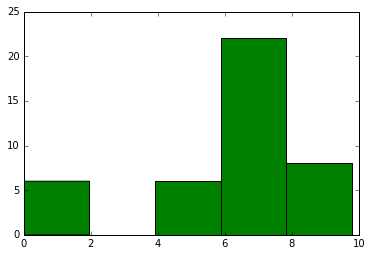

In [8]:
plt.hist(dt, bins = 5, color='green')

> **4.** After talking to the natural history museum, you discover that butterflies that were missing from their collection were included in the data they gave you, but with a wing width of 0.0.

> Count how many wings have been given a wing width of zero

In [14]:
print((dt==0).sum())

6


> **5.** You realise these zero-width wings have skewed your results. Create a new numpy array that only contains the wing widths greater than zero. (Use Boolean indexing for this task). Now find the new mean, median and min and max. Plot a histogram of this data

6.97416666667
6.925
1.04552319439
9.79
4.92


(array([  6.,  10.,  12.,   6.,   2.]),
 array([ 4.92 ,  5.894,  6.868,  7.842,  8.816,  9.79 ]),
 <a list of 5 Patch objects>)

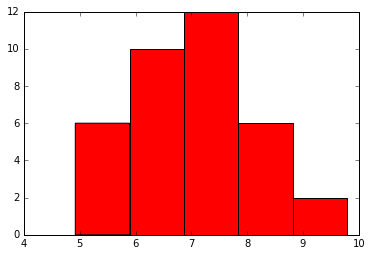

In [16]:
dt2 = dt[dt>0]

print np.mean(dt2)
print np.median(dt2)
print np.std(dt2)

print np.max(dt2)
print np.min(dt2)

plt.hist(dt2, bins = 5, color='red')

# Problem 2: Plotting parabolas
Write Python code that produces the following figure:

(You might want to make use of the `np.linspace` function)

![alt text](http://www.cs.ucl.ac.uk/scipython/img/a4_parabolas.png "Parabolas")

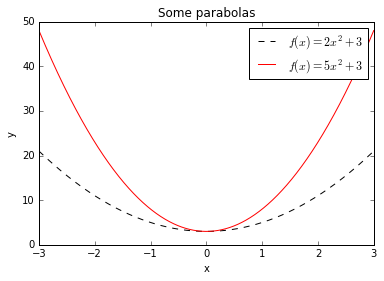

In [31]:

def f1(x):
    return 2*x**2+3

def f2(x):
    return 5*x**2+3


x=np.linspace(-3,3,1000)
y1 = [f1(i) for i in x]
y2 = [f2(i) for i in x]

plt.plot(x,y1, color = 'black', linestyle = '--')
plt.plot(x,y2, color = 'red')
plt.title('Some parabolas')
plt.xlabel('x')
plt.ylabel('y')
plt.legend([r'$f(x) = 2x^{2} + 3$', r'$f(x) = 5x^{2} + 3$'])


# Problem 3: Healthy Breakfast
In this exercise we will do some simple analyses on a data set that contains information about 77 types of breakfast cereal. You can read about the data set at [CMU's website](http://lib.stat.cmu.edu/DASL/Stories/HealthyBreakfast.html). Download the files [cereal.csv](http://www.cs.ucl.ac.uk/scipython/resources/cereal.txt) from the course website. Below you can find a small code snippet to get you started on  reading the data set from the file.

In [32]:
%matplotlib inline

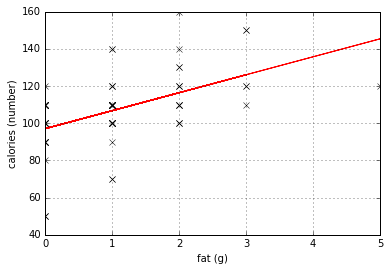

In [34]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

def getData(filename='cereal.txt'):
    """
    Reads space separated CSV into a Pandas Dataframe
    """
    col_labels = ["name", "mfr", "type", "calories (number)", "protein (g)", "fat (g)", "sodium (mg)", 
                      "dietary fiber (g)", "complex carbohydrates (g)", "sugars (g)", 
                      "display shelf", "potassium (mg)", 
                      "vitamins and minerals", 
                      "weight (in ounces) of one serving (serving size)", "cups per serving"]

    df = pd.read_csv(filename, sep=' ', header=None, names=col_labels)
    
    return df

def plotFatVsCalories(df):    
    """
    Plots fat content vs calories
    """
    
    fat = df['fat (g)']
    calories = df['calories (number)']
    
    plt.plot(fat, calories ,'kx')
    plt.xlabel('fat (g)')
    plt.ylabel('calories (number)')
    plt.grid()

    # fit a line through the points
    coefficients = np.polyfit(fat, calories, 1)
    poly = np.poly1d(coefficients)
    plt.plot(fat,poly(fat), 'r-')


df = getData()
plotFatVsCalories(df)

Please complete the following tasks:

> **1.** Compute the average number of calories, as well as the average amount of complex carbohydrates and sugars in the data set.

In [44]:
#print df

print(df.ix[0])

print(['average calories', df['calories (number)'].mean()])
print(['average complex carbs', df['complex carbohydrates (g)'].mean()])
print(['average sugars', df['sugars (g)'].mean()])


name                                                100%_Bran
mfr                                                         N
type                                                        C
calories (number)                                          70
protein (g)                                                 4
fat (g)                                                     1
sodium (mg)                                               130
dietary fiber (g)                                          10
complex carbohydrates (g)                                   5
sugars (g)                                                  6
display shelf                                               3
potassium (mg)                                            280
vitamins and minerals                                      25
weight (in ounces) of one serving (serving size)            1
cups per serving                                         0.33
Name: 0, dtype: object
['average calories', 106.88311688311688]
['aver

> **2.** What is the name of the cereal that has the highest sugar content?

In [48]:
maxid = df['sugars (g)'].argmax()

print(df.ix[maxid])

name                                                Golden_Crisp
mfr                                                            P
type                                                           C
calories (number)                                            100
protein (g)                                                    2
fat (g)                                                        0
sodium (mg)                                                   45
dietary fiber (g)                                              0
complex carbohydrates (g)                                     11
sugars (g)                                                    15
display shelf                                                  1
potassium (mg)                                                40
vitamins and minerals                                         25
weight (in ounces) of one serving (serving size)               1
cups per serving                                            0.88
Name: 30, dtype: object


> **3.** The 8th column of the data set contains the shelf at which the cereal is displayed in the supermarket (either 1, 2, or 3). Compute the mean number of calories of the cereals displayed in each shelf. If you do this correctly you should find the the cereals displayed on the middle shelf have a higher calory content on average. 

In [57]:
df.groupby('display shelf')['calories (number)'].mean()

display shelf
1    102.500000
2    109.523810
3    107.777778
Name: calories (number), dtype: float64

> **4.** Make a box plot showing the sugar content of cereals grouped by shelf (recreating the plot that you'll find on the homepage for this data set). 

{'boxes': [<matplotlib.lines.Line2D at 0xe32b5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x10e1b320>,
 'fliers': [<matplotlib.lines.Line2D at 0x10e273c8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10e1be10>,
 'whiskers': [<matplotlib.lines.Line2D at 0xe32b7b8>,
  <matplotlib.lines.Line2D at 0x10e4fac8>]}

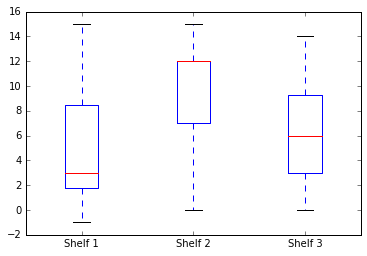

In [89]:
#help(plt.boxplot)

shelf1 =df.ix[(df['display shelf']==1)]['sugars (g)']
shelf2 =df.ix[(df['display shelf']==2)]['sugars (g)']
shelf3 =df.ix[(df['display shelf']==3)]['sugars (g)']

plt.boxplot([shelf1, shelf2, shelf3], labels =['Shelf 1', 'Shelf 2', 'Shelf 3'])

#print([shelf1, shelf2, shelf3])



> **5.** Explore the data set by plotting and regressing the different variables against each other.

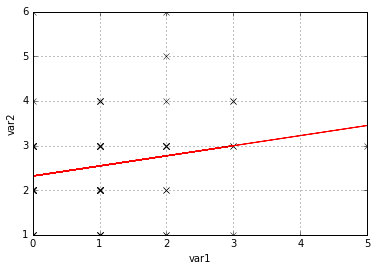

In [97]:
def reg_and_plot(var1, var2):
    
    var1 = df[var1]
    var2 = df[var2]
    
    #var1_lab = df.dtype.value[var1]
    #var2_lab = df.dtype.value[var2]
    
    plt.plot(var1, var2 ,'kx')
    plt.xlabel('var1')
    plt.ylabel('var2')
    plt.grid()

    # fit a line through the points
    coefficients = np.polyfit(var1, var2, 1)
    poly = np.poly1d(coefficients)
    plt.plot(var1,poly(var1), 'r-')
    
reg_and_plot('fat (g)', 'protein (g)')


# Problem 4: Chocolate makes you faster?
Your colleague (a psychologist) has conducted an experiment where he measured subjects' performance on a memory and a reaction time task. He claims to have found a correlation between the two, but you are sceptical, because you know your colleague is not very good at clicking buttons in SPSS. Luckily, you can convince your colleague to give you his data file so you can assess his claims. 
 
> **1.** He gives you the file [experiment.csv](http://www.cs.ucl.ac.uk/scipython/resources/experiment.csv). It contains one line per subject, and each line contains the values for the following variables that he measured: `height`, `weight`, `amount-chocolate`, `task-one-score`, `task-two-score`. (He allowed the participants to eat chocolate during the experiment, and the third column shows the amount of chocolate they ate in grams.) Load the data into an array. 

> You can choose whether to use Pandas or Numpy for this exercise - or both!

> **2.** As a sanity check, create a scatter plot of height vs. weight. These two should clearly be correlated and you should see a straight line relationship.

> **3.** To assess your colleague's claim, first create a box plot of the scores in task 1 and task 2. Also, compute the correlation between the two (using Pearson's $r$) and check whether it is significant. _Hint_: Use the function `scipy.stats.pearsonr`.

> **4.** When your colleague hears about your results, he is a bit disappointed. However, he already has a new hypothesis: maybe chocolate is acting as a promoter somehow and the amount of chocolate consumed has some effect? Create some plots and hypothesis tests to assess this new hypothesis. 

> **5.** After you come back with your results, your colleague has one last idea: Maybe you need to eat more than some critical amount of chocolate (which depends on your body mass index) in order for there to be a correlation between the two tasks? He guesses that you need to eat at least six times your BMI in chocolate in order for the correlation to show up. You think your colleague is crazy, but go ahead an test his claim. What do you find? Again, produce some figures, compute correlations and test for significance.